<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font>
<p></p>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Depp Learning - Dr. Fatemizadeh
</font>
<br/>
Fall 2022

</div>

<hr/>
	<div align=center>
	<font color=red>
		Practical Assignment 2
	</font>
	<p></p>
	<font>
		Latin Alphabet
	</font>
</div>

# Personal Data

In [1]:
student_number = 98102527
Name = 'Ali'
Last_Name = 'Nourian'

# Import Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from time import localtime

# Device

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Import Data

In [5]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/deep-data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_val_df = pd.read_csv('Q3_train.csv')
print(train_val_df.shape) # 27455 * 785

y_train_val_df = train_val_df.iloc[:, 0]
y_train_val_df[y_train_val_df > 9] -= 1
train_val_df.iloc[:, 0] = y_train_val_df

(27455, 785)


In [7]:
test_df = pd.read_csv('Q3_test.csv')
print(test_df.shape) # 7172 * 785

y_test_df = test_df.iloc[:, 0]
y_test_df[y_test_df > 9] -= 1
test_df.iloc[:, 0] = y_test_df

(7172, 785)


In [8]:
train_val_df.groupby('label').describe()

pixel1                                                             \
        count        mean        std    min    25%    50%     75%    max   
label                                                                      
0      1126.0  164.192718  35.654405    9.0  146.0  168.0  187.00  251.0   
1      1010.0  145.215842  41.161590    0.0  130.0  153.0  172.00  236.0   
2      1144.0  160.759615  38.059112   37.0  142.0  167.0  186.00  251.0   
3      1196.0  135.755853  41.465282    0.0  108.0  141.5  166.00  235.0   
4       957.0  165.823406  33.563017   77.0  141.0  168.0  191.00  255.0   
5      1204.0  142.225914  36.677251   22.0  122.0  147.0  166.00  241.0   
6      1090.0  172.902752  28.232728  102.0  154.0  173.0  192.00  255.0   
7      1013.0  164.142152  33.420567   55.0  142.0  163.0  189.00  255.0   
8      1162.0  158.496558  34.650295   26.0  139.0  165.0  180.00  241.0   
9      1114.0   98.201077  39.890584    0.0   74.0  100.5  125.00  204.0   
10     1241.0  145.435939  28.758017   50.0  126.0  144.0  167.00  229.0   
11     1055.0  154.750711  34.344546   37.0  136.0  158.0  178.50  247.0   
12     1151.0  157.411816  37.304235   32.0  134.0  159.0  185.00  251.0   
13     1196.0  161.355351  31.850224   74.0  137.0  163.0  185.00  248.0   
14     1088.0  112.225184  44.957056    0.0   80.0  113.0  146.00  232.0   
15     1279.0  117.048475  45.341902    0.0   84.0  112.0  150.50  251.0   
16     1294.0  134.270479  34.784669   22.0  114.0  138.0  159.00  241.0   
17     1199.0  151.948290  34.918493   35.0  133.0  153.0  175.00  246.0   
18     1186.0  166.867622  28.011092   66.0  148.0  169.0  186.75  252.0   
19     1161.0  132.024117  38.873062   14.0  113.0  137.0  159.00  216.0   
20     1082.0  142.470425  34.697258    0.0  124.0  145.0  166.00  229.0   
21     1225.0  123.885714  40.580570   15.0   94.0  124.0  153.00  232.0   
22     1164.0  146.842784  46.260898    0.0  129.0  155.5  177.00  239.0   
23     1118.0  145.576029  36.007870   19.0  125.0  148.0  171.75  234.0   

       pixel2              ... pixel783        pixel784              \
        count        mean  ...      75%    max    count        mean   
label                      ...                                        
0      1126.0  165.654529  ...    213.0  255.0   1126.0  174.761989   
1      1010.0  147.747525  ...    193.0  255.0   1010.0  135.559406   
2      1144.0  163.133741  ...    221.0  255.0   1144.0  198.966783   
3      1196.0  139.376254  ...    194.0  255.0   1196.0  139.172241   
4       957.0  167.623824  ...    215.0  255.0    957.0  176.704284   
5      1204.0  146.210963  ...    206.0  255.0   1204.0  168.648671   
6      1090.0  174.281651  ...    189.0  253.0   1090.0  130.490826   
7      1013.0  166.440276  ...    189.0  255.0   1013.0  141.894373   
8      1162.0  160.747849  ...    200.0  255.0   1162.0  158.351119   
9      1114.0  105.070916  ...    209.0  255.0   1114.0  165.253142   
10     1241.0  149.220790  ...    200.0  255.0   1241.0  163.932313   
11     1055.0  157.974408  ...    211.5  255.0   1055.0  177.495735   
12     1151.0  160.854040  ...    207.0  255.0   1151.0  163.814075   
13     1196.0  163.436455  ...    211.0  255.0   1196.0  174.612876   
14     1088.0  110.930147  ...    146.0  255.0   1088.0  118.699449   
15     1279.0  120.875684  ...    209.0  255.0   1279.0  143.525410   
16     1294.0  138.169243  ...    201.0  255.0   1294.0  158.412674   
17     1199.0  154.548791  ...    210.0  255.0   1199.0  170.804837   
18     1186.0  168.720067  ...    204.0  255.0   1186.0  166.630691   
19     1161.0  135.395349  ...    208.0  255.0   1161.0  171.611542   
20     1082.0  147.283734  ...    200.0  255.0   1082.0  151.692237   
21     1225.0  128.200816  ...    202.0  255.0   1225.0  151.715102   
22     1164.0  151.432990  ...    212.0  255.0   1164.0  169.615979   
23     1118.0  149.663685  ...    199.0  255.0   1118.0  160.227191   

                                    

# Preparing Data & Data Loader (+ Data Augmentation)

In [10]:
train_val_set = torch.tensor(train_val_df.values, dtype=torch.float32)

train_set = torch.tensor([])
val_set = torch.tensor([])
N = 1300
for i in range(24):
    help_set = train_val_set[train_val_set[:, 0] == i]
    n_aug = 1300 - help_set.shape[0]
    r = np.random.randint(help_set.shape[0], size=n_aug)
    help_set = torch.cat((help_set, help_set[r]) , 0)
    rN = torch.randperm(N)
    help_set = help_set[rN]
    train_size = int(0.8 * N)
    train_set = torch.cat((train_set, help_set[:train_size,:]), 0)
    val_set = torch.cat((val_set, help_set[train_size:,:]), 0)

x_train = train_set[:, 1:] / 255
y_train = train_set[:, 0].type(torch.LongTensor)

x_val = val_set[:, 1:] / 255
y_val = val_set[:, 0].type(torch.LongTensor)

test_set = torch.tensor(test_df.values, dtype=torch.float32)
x_test = test_set[:, 1:] / 255
y_test = test_set[:, 0].type(torch.LongTensor)

# =========================== convert sets to loader ===========================
train_set_tuple = list(map(lambda x, y: (x, y), x_train, y_train))
val_set_tuple = list(map(lambda x, y: (x, y), x_val, y_val))

batch_size = 256

train_loader = torch.utils.data.DataLoader(train_set_tuple, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set_tuple, batch_size=batch_size, shuffle=True, num_workers=2)

# Visualization

In [11]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

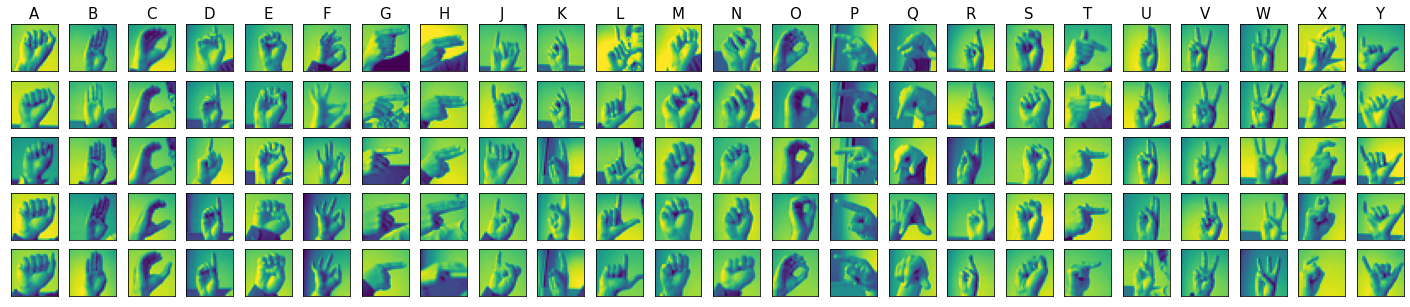

In [12]:
num_img_per_class = 5
sample_images = []

for i in range(len(classes)):
  local_data = train_val_set[train_val_set[:, 0] == i][:, 1:]
  rand_nums = np.random.randint(local_data.shape[0], size=num_img_per_class) + 1
  for j in rand_nums:
    sample_images.append(local_data[j].reshape(28, 28))


fig, axes = plt.subplots(num_img_per_class, len(classes), figsize=(25,5))

i = 0
for col in range(len(classes)):
  axes[0][col].set_title(classes[col], fontsize=15)
  for row in range(num_img_per_class):
    axis = axes[row][col]
    axis.set_xticks([])
    axis.set_yticks([])
    axis.imshow(sample_images[i])
    i += 1

# Training Functions

In [14]:
def train_epoch(net, criterion, optimizer, dataloader):
  epoch_loss = 0
  epoch_true = 0
  epoch_all = 0
  train_loss = 0
  train_accuracy = 0
  i = 0

  net.train()
  for i, (x, y) in enumerate(dataloader):
    # x = x.reshape(x.shape[0], 784)
    # y = y.type(torch.FloatTensor)
    p = net(x)

    loss = criterion(p, y)
    epoch_loss += float(loss)

    predictions = p.argmax(-1)
    epoch_all += len(predictions)
    epoch_true += (predictions == y).sum()
    
    train_loss = epoch_loss / (i + 1)
    train_accuracy = epoch_true / epoch_all

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

  return train_loss, train_accuracy


def evaluate_epoch(net, criterion, dataloader):
  epoch_loss = 0
  epoch_true = 0
  epoch_all = 0
  eval_loss = 0
  eval_accuracy = 0
  i = 0

  net.eval()
  for i, (x, y) in enumerate(dataloader):
    # x = x.reshape(x.shape[0], 784)
    # y = y.type(torch.FloatTensor)
    p = net(x)

    loss = criterion(p, y)
    epoch_loss += float(loss)

    predictions = p.argmax(-1)
    epoch_all += len(predictions)
    epoch_true += (predictions == y).sum()

    eval_loss = epoch_loss / (i + 1)
    eval_accuracy = epoch_true / epoch_all

  return eval_loss, eval_accuracy


def getTime():
  loc_time = localtime()
  hour, min, sec = loc_time.tm_hour, loc_time.tm_min, loc_time.tm_sec
  return str(hour) + ":" + str(min) + ":" + str(sec)


def train_model(net, n_epochs, criterion, optimizer, train_loader, val_loader=None):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for e in range(n_epochs):
        train_loss, train_accuracy = train_epoch(net, criterion, optimizer, train_loader)
        if val_loader is not None:
            val_loss, val_accuracy = evaluate_epoch(net, criterion, val_loader)

        train_losses.append(train_loss)
        train_accuracies.append(float(train_accuracy))
        if val_loader is not None:
            val_losses.append(val_loss)
            val_accuracies.append(float(val_accuracy))

        print(f'[Epoch {e+1}]\t [{getTime()}]\t', end="")
        print(f'Train Loss: {train_loss:.4f}\tTrain Accuracy: {train_accuracy:.2f}\t', end="")
        if val_loader is not None:
            print(f'Validation Loss: {val_loss:.4f}\t\tValidation Accuracy: {val_accuracy:.2f}')
        else:
            print()
    
    return train_losses, train_accuracies, val_losses, val_accuracies

# Define Model

In [16]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()

        self.input_dim = 784
        self.hidden_dims=[256, 64] #[1024, 2048, 256]
        self.output_dim = 24
        
        self.fc = nn.Sequential(
            nn.BatchNorm1d(self.input_dim),
            nn.Linear(self.input_dim, self.hidden_dims[0]),
            nn.BatchNorm1d(self.hidden_dims[0]),
            nn.ReLU(),
            nn.Linear(self.hidden_dims[0], self.hidden_dims[1]),
            nn.BatchNorm1d(self.hidden_dims[1]),
            # nn.ReLU(),
            # nn.Linear(self.hidden_dims[1], self.hidden_dims[2]),
            # nn.ReLU(),
            nn.Linear(self.hidden_dims[1], self.output_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        return self.fc(x)

## Test Model

### ADAM

In [17]:
net = MyNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-3)

train_loss, train_acc, val_loss, val_acc = train_model(net, 10, criterion, optimizer, train_loader, val_loader)

[Epoch 1]	 [15:28:38]	Train Loss: 2.7003	Train Accuracy: 0.66	Validation Loss: 2.4452		Validation Accuracy: 0.89
[Epoch 2]	 [15:28:39]	Train Loss: 2.3310	Train Accuracy: 0.96	Validation Loss: 2.2859		Validation Accuracy: 0.99
[Epoch 3]	 [15:28:40]	Train Loss: 2.2686	Train Accuracy: 0.99	Validation Loss: 2.2602		Validation Accuracy: 1.00
[Epoch 4]	 [15:28:42]	Train Loss: 2.2639	Train Accuracy: 1.00	Validation Loss: 2.2656		Validation Accuracy: 1.00
[Epoch 5]	 [15:28:43]	Train Loss: 2.2625	Train Accuracy: 1.00	Validation Loss: 2.2574		Validation Accuracy: 1.00
[Epoch 6]	 [15:28:44]	Train Loss: 2.2541	Train Accuracy: 1.00	Validation Loss: 2.2542		Validation Accuracy: 1.00
[Epoch 7]	 [15:28:45]	Train Loss: 2.2515	Train Accuracy: 1.00	Validation Loss: 2.2535		Validation Accuracy: 1.00
[Epoch 8]	 [15:28:47]	Train Loss: 2.2849	Train Accuracy: 0.99	Validation Loss: 2.2841		Validation Accuracy: 0.99
[Epoch 9]	 [15:28:48]	Train Loss: 2.2574	Train Accuracy: 1.00	Validation Loss: 2.2512		Validatio

In [18]:
y_hat = net.forward(x_test)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_test == pred) / y_test.shape[0] * 100
print(f'accuracy: {acc}')

accuracy: 81.20468139648438


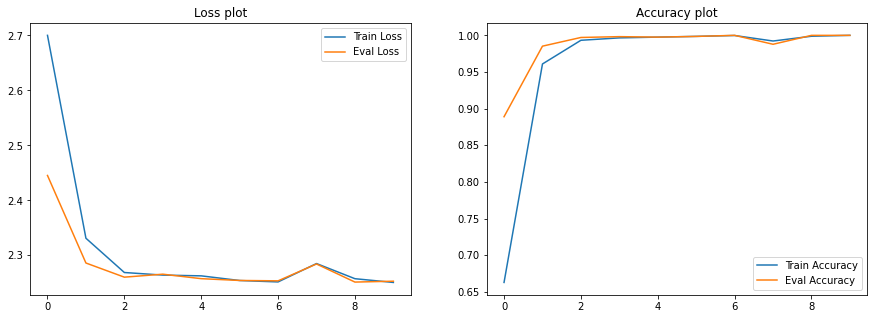

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axis = axes[0]
axis.plot(train_loss)
axis.plot(val_loss)
axis.set_title('Loss plot')
axis.legend(['Train Loss', 'Eval Loss'])

axis = axes[1]
axis.plot(train_acc)
axis.plot(val_acc)
axis.set_title('Accuracy plot')
axis.legend(['Train Accuracy', 'Eval Accuracy'])

### SGD

In [24]:
net_sgd = MyNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_sgd.parameters(), lr=0.01, momentum=0.9)

train_loss, train_acc, val_loss, val_acc = train_model(net_sgd, 10, criterion, optimizer, train_loader, val_loader)

[Epoch 1]	 [15:34:30]	Train Loss: 3.0767	Train Accuracy: 0.26	Validation Loss: 2.9528		Validation Accuracy: 0.44
[Epoch 2]	 [15:34:31]	Train Loss: 2.8277	Train Accuracy: 0.54	Validation Loss: 2.7212		Validation Accuracy: 0.65
[Epoch 3]	 [15:34:32]	Train Loss: 2.6290	Train Accuracy: 0.73	Validation Loss: 2.5448		Validation Accuracy: 0.82
[Epoch 4]	 [15:34:34]	Train Loss: 2.4614	Train Accuracy: 0.88	Validation Loss: 2.3880		Validation Accuracy: 0.94
[Epoch 5]	 [15:34:35]	Train Loss: 2.3460	Train Accuracy: 0.95	Validation Loss: 2.3105		Validation Accuracy: 0.98
[Epoch 6]	 [15:34:36]	Train Loss: 2.2945	Train Accuracy: 0.98	Validation Loss: 2.2810		Validation Accuracy: 0.99
[Epoch 7]	 [15:34:37]	Train Loss: 2.2730	Train Accuracy: 0.99	Validation Loss: 2.2662		Validation Accuracy: 0.99
[Epoch 8]	 [15:34:38]	Train Loss: 2.2645	Train Accuracy: 0.99	Validation Loss: 2.2617		Validation Accuracy: 0.99
[Epoch 9]	 [15:34:39]	Train Loss: 2.2606	Train Accuracy: 0.99	Validation Loss: 2.2576		Validatio

In [25]:
y_hat = net_sgd.forward(x_test)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_test == pred) / y_test.shape[0] * 100
print(f'accuracy: {acc}')

accuracy: 76.88232421875


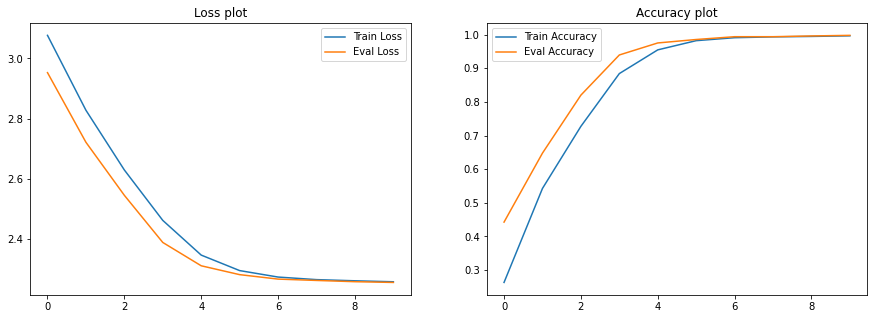

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axis = axes[0]
axis.plot(train_loss)
axis.plot(val_loss)
axis.set_title('Loss plot')
axis.legend(['Train Loss', 'Eval Loss'])

axis = axes[1]
axis.plot(train_acc)
axis.plot(val_acc)
axis.set_title('Accuracy plot')
axis.legend(['Train Accuracy', 'Eval Accuracy'])

# New Model with Dropout

In [27]:
class MyNet_d(nn.Module):
    def __init__(self):
        super(MyNet_d, self).__init__()

        self.input_dim = 784
        self.hidden_dims=[256, 64] #[1024, 2048, 256]
        self.output_dim = 24
        
        self.fc = nn.Sequential(
            nn.BatchNorm1d(self.input_dim),
            nn.Linear(self.input_dim, self.hidden_dims[0]),
            # nn.BatchNorm1d(self.hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout1d(p=0.1),
            nn.Linear(self.hidden_dims[0], self.hidden_dims[1]),
            nn.BatchNorm1d(self.hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout1d(p=0.1),
            # nn.Linear(self.hidden_dims[1], self.hidden_dims[2]),
            # nn.ReLU(),
            # nn.Dropout1d(p=0.1),
            nn.Linear(self.hidden_dims[1], self.output_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        return self.fc(x)

## Test Model

In [33]:
net_d = MyNet_d()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net_d.parameters(), lr=1e-3, weight_decay=1e-3)
# optimizer = torch.optim.SGD(net_d.parameters(), lr=0.01, momentum=0.9)
train_loss, train_acc, val_loss, val_acc = train_model(net_d, 10, criterion, optimizer, train_loader, val_loader)

[Epoch 1]	 [15:38:4]	Train Loss: 2.9489	Train Accuracy: 0.35	Validation Loss: 2.7509		Validation Accuracy: 0.62
[Epoch 2]	 [15:38:7]	Train Loss: 2.6589	Train Accuracy: 0.64	Validation Loss: 2.4486		Validation Accuracy: 0.92
[Epoch 3]	 [15:38:8]	Train Loss: 2.4752	Train Accuracy: 0.80	Validation Loss: 2.3022		Validation Accuracy: 1.00
[Epoch 4]	 [15:38:10]	Train Loss: 2.4398	Train Accuracy: 0.81	Validation Loss: 2.2822		Validation Accuracy: 1.00
[Epoch 5]	 [15:38:11]	Train Loss: 2.4380	Train Accuracy: 0.82	Validation Loss: 2.3206		Validation Accuracy: 0.99
[Epoch 6]	 [15:38:12]	Train Loss: 2.4373	Train Accuracy: 0.82	Validation Loss: 2.2732		Validation Accuracy: 1.00
[Epoch 7]	 [15:38:13]	Train Loss: 2.4251	Train Accuracy: 0.82	Validation Loss: 2.2807		Validation Accuracy: 1.00
[Epoch 8]	 [15:38:15]	Train Loss: 2.4523	Train Accuracy: 0.81	Validation Loss: 2.3130		Validation Accuracy: 0.99
[Epoch 9]	 [15:38:16]	Train Loss: 2.4329	Train Accuracy: 0.82	Validation Loss: 2.2713		Validation A

In [34]:
y_hat = net_d.forward(x_train)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_train == pred) / y_train.shape[0] * 100
print(f'Train Accuracy: {acc}')


y_hat = net_d.forward(x_test)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_test == pred) / y_test.shape[0] * 100
print(f'Test Accuracy: {acc}')

Train Accuracy: 100.0
Test Accuracy: 82.32013702392578


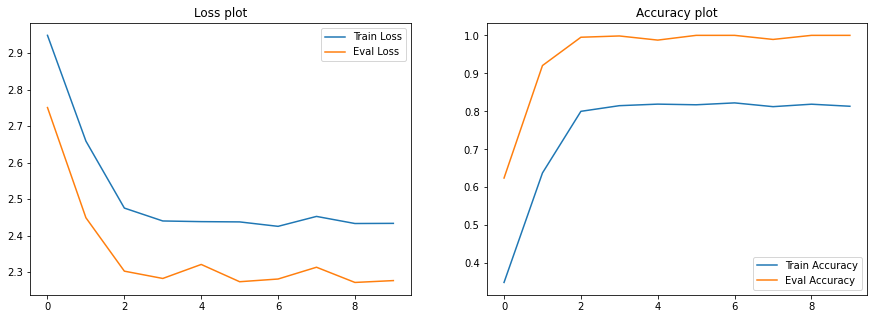

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axis = axes[0]
axis.plot(train_loss)
axis.plot(val_loss)
axis.set_title('Loss plot')
axis.legend(['Train Loss', 'Eval Loss'])

axis = axes[1]
axis.plot(train_acc)
axis.plot(val_acc)
axis.set_title('Accuracy plot')
axis.legend(['Train Accuracy', 'Eval Accuracy'])

# Offline Model Testing: Image Input (Optional)

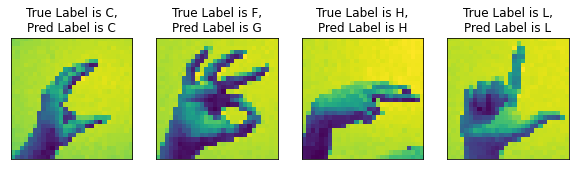

In [38]:
import cv2


def rgb2gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def resize_image(image, size=(28, 28)):
    scaled_image = cv2.resize(image, (28, 28), interpolation = cv2.INTER_LINEAR) / 255
    return scaled_image

images = []
img = cv2.imread('Cy.jpg', cv2.IMREAD_UNCHANGED)
images.append(img)
img = cv2.imread('F4.jpg', cv2.IMREAD_UNCHANGED)
images.append(img)
img = cv2.imread('H.jpg', cv2.IMREAD_UNCHANGED)
images.append(img)
img = cv2.imread('L2.jpg', cv2.IMREAD_UNCHANGED)
images.append(img)

names = ['C', 'F', 'H', 'L']
plt.figure(figsize=(10, 5))
for i in range(len(images)):
    images[i] = resize_image(rgb2gray(images[i]))
    
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    x = torch.tensor([images[i].reshape(28*28,)]).float()
    y_hat = net_d.forward(x)
    pred = torch.argmax(y_hat)
    pred_class = classes[pred]
    plt.title(f'True Label is {names[i]},\nPred Label is {pred_class}')


# Online Model Testing: Video Input (Optional)

## Import Libraries & Helping Functions

In [39]:
import cv2
from google.colab.output import eval_js
from IPython.display import display, Javascript, Image
from base64 import b64decode, b64encode

In [40]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 28, 28);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 28; //video.videoWidth;
      captureCanvas.height = 28; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def detect_image(net, image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    scaled_image = cv2.resize(gray_image, (28, 28), interpolation = cv2.INTER_LINEAR) / 255

    # torch.set_default_tensor_type(torch.FloatTensor)
    # print(type(scaled_image), scaled_image.shape)
    # scaled_image = np.transpose(scaled_image)
    x = torch.tensor([scaled_image.reshape(28*28,)])
    y_hat = net.forward(x.float())

    pred = torch.argmax(y_hat)
    pred_class = classes[pred]
    return pred_class

## Capturing...

In [42]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    pred_class = detect_image(net_d, frame)
    label_html = pred_class # 'Capturing...'


<IPython.core.display.Javascript object>